In [55]:
import sqlite3
from matplotlib.pylab import *
from scipy.stats import norm
from pprint import pprint
from pandas import DataFrame
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.interpolate import *
import math
import numpy as np

## Geting Statistics 
To make the latter qualtile data analysis easier, I imported data with bike count in accending order 

In [56]:
conn = sqlite3.connect('bicycle.db')
c=conn.cursor()
c.execute('SELECT HiTemp, LoTemp, Precip, Manhattan FROM bicycle ORDER BY Manhattan')
data=c.fetchall()
X=DataFrame(data, columns=['HiTemp', 'LoTemp', 'Precip', 'BikeCount'])

#### Mean & Median

In [57]:
mean=X['BikeCount'].mean()# mean is less roburst 
median=X['BikeCount'].median()# median is roburst 
pprint(mean)
pprint(median)

5049.688775510204
5160.5


#### Correlation

In [58]:
print(X.corr())

             HiTemp    LoTemp    Precip  BikeCount
HiTemp     1.000000  0.914603 -0.045208   0.482370
LoTemp     0.914603  1.000000  0.056186   0.348084
Precip    -0.045208  0.056186  1.000000  -0.422629
BikeCount  0.482370  0.348084 -0.422629   1.000000


In [64]:
def crtPlot (x, y):
    p1=polyfit(x,y,1)
    %matplotlib inline
    plot(x,y, 'o')
    plot(x, polyval(p1, x), 'r-')
    show()

####  HiTmep vs BikeCount 

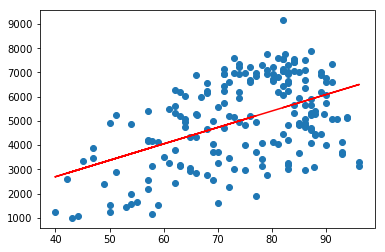

In [66]:
crtPlot(X['HiTemp'],X['BikeCount'])

####  LoTmep vs. BikeCount 

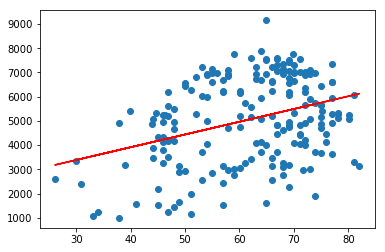

In [67]:
crtPlot(X['LoTemp'],X['BikeCount'])

#### Precip and BikeCount 

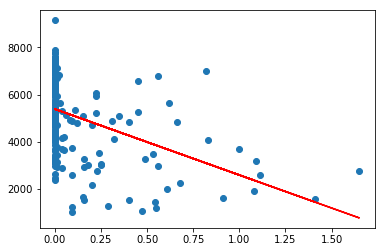

In [68]:
crtPlot(X['Precip'],X['BikeCount'])

In [70]:
conn.close() 

## Analysis
By comparing the last collumn of the correlation matrix and the graph above. We see that when the correation between the attribute and the Bike count is positive, the trendline will have a positve slope, and the correlation is negative, the trendline will have a negative slope. 

Something interesting to point out is that the high temperature actually have a stronger correlation with the bike count than the low temperature. And the precipitation also have slightly strong correlation with the bike load.  It make sense that when the precipitation is high, peoplea re less likely to ride a bike, and when it's cold most people would probably prefer to take a public transit or drive a car, so that they can be more protected from the cold wind. And It's also important to know that correlation can change when different range of the data is taken.

## Further Exploration to Try
Something else to try would be calculating the total error of the linear regression model among different middle several deciles of data. To see how the total error change. Intuitively, the interdecile range with the least error could be the best data selection to predict a more general model.

Since we know that the mean value is not robust, we can also calculate the mean value among different middle several deciles of the data. If the mean barely change as the range of data gets smaller, then that range could be a possible cut used to remove the outliner.